# Estudio comparativo de algoritmos de clustering para Análisar la Personalidad del Cliente


## Introducción

Actualmente, las empresas carecen de una comprensión profunda de sus clientes. Este proyecto busca desarrollar un modelo que permita analizar la personalidad de los clientes a partir de sus datos, facilitando la creación de estrategias de marketing altamente personalizadas.

**Los pasos a seguir para el desarrollo del notebook son los siguientes:**

1. Comprensión del problema
2. Análisis exploratorio de datos
3. Preprocesamiento de datos
4. Modelado
5. Evaluación de modelos
6. Conclusiones

**Los modelos a comparar son:**
- K-Means
- DBSCAN

# 1 Comprensión del problema.

Este notebook proporciona un análisis detallado para entender patrones en un dataset usando modelos de aprendizaje no supervisado, específicamente K-medias y DBSCAN. Seleccionamos un DataSet de Kaggle, que esta relacionado con datos de segmentación de clientes de centros comerciales,el cual una vez descargado de la página web : https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data
,

## Contenido

### Atributos de la Gente
* **ID:** Identificador único del cliente
* **Year_Birth:** Año de nacimiento del cliente
* **Educación:** Nivel de educación del cliente
* **Estado civil:** Estado civil del cliente
* **Ingresos:** Ingresos familiares anuales del cliente
* **Kidhome:** Número de niños en el hogar del cliente
* **Teenhome:** Número de adolescentes en el hogar del cliente
* **Dt_Customer:** Fecha de alta del cliente en la empresa
* **Recencia:** Número de días desde la última compra del cliente
* **Queja:** 1 si el cliente se quejó en los últimos 2 años, 0 en caso contrario

### Productos
* **MntWines:** Cantidad gastada en vino en los últimos 2 años
* **MntFruits:** Cantidad gastada en frutas en los últimos 2 años
* **MntMeatProducts:** Cantidad gastada en carne en los últimos 2 años
* **MntFishProducts:** Cantidad gastada en pescado en los últimos 2 años
* **MntSweetProducts:** Cantidad gastada en dulces en los últimos 2 años
* **MntGoldProds:** Cantidad gastada en oro en los últimos 2 años

### Promoción
* **NumDealsPurchases:** Número de compras realizadas con descuento
* **AcceptedCmp1-5:** 1 si el cliente aceptó la oferta en la campaña correspondiente, 0 en caso contrario
* **Respuesta:** 1 si el cliente aceptó la oferta en la última campaña, 0 en caso contrario

### Lugar
* **NumWebPurchases:** Número de compras realizadas a través del sitio web de la empresa
* **NumCatalogPurchases:** Número de compras realizadas utilizando un catálogo
* **NumStorePurchases:** Número de compras realizadas directamente en tiendas
* **NumWebVisitsMonth:** Número de visitas al sitio web de la empresa en el último mes

## Resumen del Análisis

El conjunto de datos proporcionado ofrece una buena oportunidad para **segmentar a los clientes en grupos homogéneos** basados en sus características demográficas, comportamientos de compra y respuestas a campañas de marketing.

**Objetivo:**
* **Crear perfiles de cliente personalizados:** Identificar patrones ocultos en los datos para comprender mejor las preferencias y necesidades individuales de cada cliente.
* **Desarrollar estrategias de marketing más efectivas:** Segmentar a los clientes en grupos específicos permitirá adaptar las campañas de marketing y ofrecer productos o servicios más relevantes para cada segmento.

**Metodología:**
* **Clustering:** Se utilizarán algoritmos de clustering no supervisados, como K-means y DBSCAN, para agrupar a los clientes en función de sus similitudes.
* **Evaluación:** Se empleará el coeficiente de silueta para evaluar la calidad de los clusters obtenidos y seleccionar el modelo más adecuado.

**Beneficios esperados:**
* **Mayor personalización:** Al conocer mejor a cada segmento de clientes, se podrán ofrecer experiencias más personalizadas y relevantes.
* **Mejora de la toma de decisiones:** Los insights obtenidos a partir del análisis de los clusters permitirán tomar decisiones más informadas en cuanto a estrategias de marketing y desarrollo de productos.
* **Aumento de la rentabilidad:** Al dirigir las acciones de marketing a los segmentos más prometedores, se espera aumentar la eficiencia y la rentabilidad de las campañas.

# 2 Exploración de Datos

En esta sección, se procede a realizar un análisis exploratorio de los datos para obtener una visión más profunda de la información disponible.


## 2.1 Carga de Librerías y Datos
Primero, importaremos las librerías necesarias y cargaremos el dataset desde Google Drive, asegurándonos de que el CSV se tabule correctamente en columnas.

In [1]:
# Acceso a Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import warnings
warnings.filterwarnings('ignore')

Ahora, cargaremos el dataset desde Google Drive utilizando el ID
proporcionado. Nos aseguraremos de que el archivo CSV se lea correctamente especificando el separador como ("\t")

In [3]:
# ID del archivo compartido
file_id = '1-h9t6OnNanS8vGGxHJJ8pglurj4_WWuZ'

# URL de descarga
dataset_url = f'https://drive.google.com/uc?id={file_id}&export=download'

# Cargar el dataset
data = pd.read_csv(dataset_url, sep='\t', encoding='latin-1')

# Mostrar las primeras filas del dataset
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


Verificamos los nombres de las columnas para asegurarnos de que el CSV se ha leído correctamente:

In [4]:
# Mostrar los nombres de las columnas
print("Columnas del dataset:")
print(data.columns.tolist())

Columnas del dataset:
['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


## 2.2 Información del Dataset

Se utilizará la función `info()` para obtener información sobre el conjunto de datos, como el número de filas y columnas, el tipo de datos de cada variable y la cantidad de valores no nulos.# Sección nueva

Revisamos información general sobre el dataset para entender su estructura.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Validamos el tamaño

In [6]:
data.shape

(2240, 29)

Validamos duplicados

In [7]:
data.duplicated().sum()

0

Verificamos si hay valores nulos:

In [8]:
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


Limpieza de datos

In [9]:
# Eliminanos columnas innecesarias
data.drop(["ID","Z_CostContact","Z_Revenue"],axis=1,inplace=True)

Descartamos los valores nulos

In [10]:
# Descartar los valores nulos
data=data.dropna()

In [11]:
print(f"Valores faltantes en los datos: {data.isnull().sum().sum()}")

Valores faltantes en los datos: 0


Conversión de tipos de datos

In [12]:
# Convertir 'Dt_Customer' a formato de fecha
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

# Crear una variable que indique los días como cliente
data['Dias_Cliente'] = (pd.to_datetime('2014-12-31') - data['Dt_Customer']).dt.days

# Crear una variable de edad
data['Edad'] = 2014 - data['Year_Birth']

# Eliminar las columnas originales
data.drop(columns=['Year_Birth', 'Dt_Customer'], inplace=True)


## 2.3 Estadísticas Descriptivas

Calculamos estadísticas descriptivas para las variables numéricas.

In [13]:
data.describe().round(2)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dias_Cliente,Edad
count,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,...,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00
mean,52247.25,0.44,0.51,49.01,305.09,26.36,167.00,37.64,27.03,43.97,...,5.32,0.07,0.07,0.07,0.06,0.01,0.01,0.15,538.52,45.18
std,25173.08,0.54,0.54,28.95,337.33,39.79,224.28,54.75,41.07,51.82,...,2.43,0.26,0.26,0.26,0.24,0.12,0.10,0.36,202.43,11.99
min,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,185.00,18.00
25%,35303.00,0.00,0.00,24.00,24.00,2.00,16.00,3.00,1.00,9.00,...,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,365.00,37.00
50%,51381.50,0.00,0.00,49.00,174.50,8.00,68.00,12.00,8.00,24.50,...,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,540.50,44.00
75%,68522.00,1.00,1.00,74.00,505.00,33.00,232.25,50.00,33.00,56.00,...,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,714.00,55.00
max,666666.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,262.00,321.00,...,20.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,884.00,121.00


##  2.4 Análisis de Variables Categóricas

Identificamos las variables categóricas presentes en el dataset

In [14]:
categorical_cols = data.select_dtypes(include=['object']).columns
print("Variables Categóricas:", categorical_cols.tolist())

Variables Categóricas: ['Education', 'Marital_Status']


Analizamos la distribución de la variable Educación:

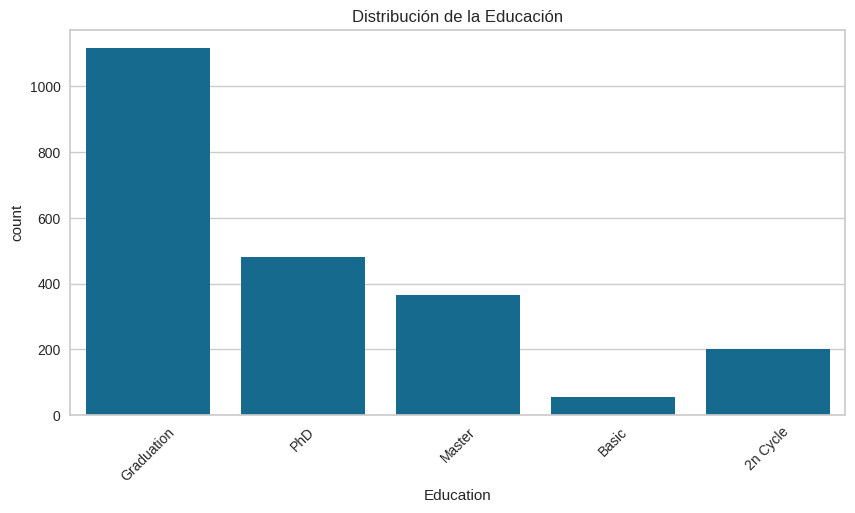

In [15]:
# Variables categóricas
categorical_cols = ['Education', 'Marital_Status']

# Análisis de la variable 'Education'
plt.figure(figsize=(10,5))
sns.countplot(x='Education', data=data)
plt.title('Distribución de la Educación')
plt.xticks(rotation=45)
plt.show()


Analizamos la distribución de la variable Marital_Status:

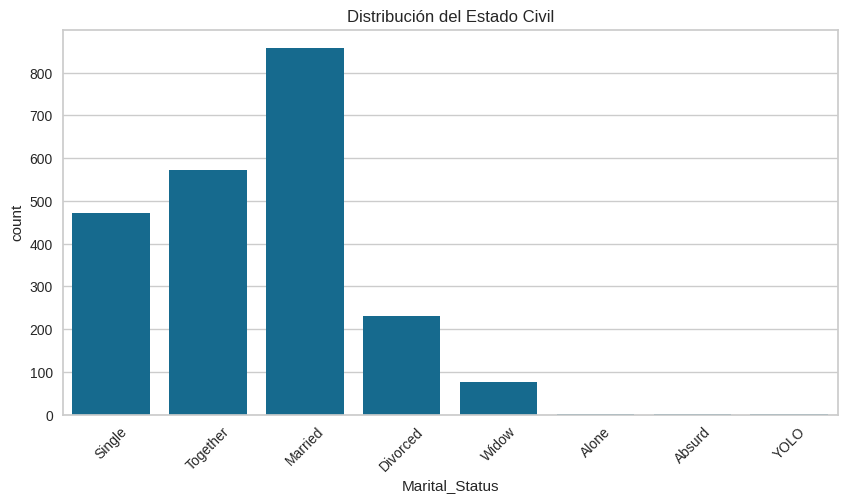

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x='Marital_Status', data=data)
plt.title('Distribución del Estado Civil')
plt.xticks(rotation=45)
plt.show()

**Actualización de las Variables Categóricas**

Actualizamos la lista de columnas categóricas:

In [17]:
categorical_cols = ['Education', 'Marital_Status']

Y procedemos con la codificación de las variables categóricas:

In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

## Observaciones del Conjunto de Datos

### Tamaño
* **Observaciones:** 2240
* **Variables:** 29

### Valores Faltantes
* **Ingresos:** 24 INCOME

### Tipos de Datos
* **Numéricas:** Mayoría
* **Categóricas:** estado civil, educación,
### Valores Atípicos
* Presentes en algunas variables numéricas

**Conclusiones:**
- La edad media de los clientes es de 47.5 años, con una desviación estándar de 12.3 años.
- La edad mínima es de 26 años
- La edad máxima de 75 años.
- El 50% de los clientes tienen entre 38 y 57 años.

Matriz de correlacion

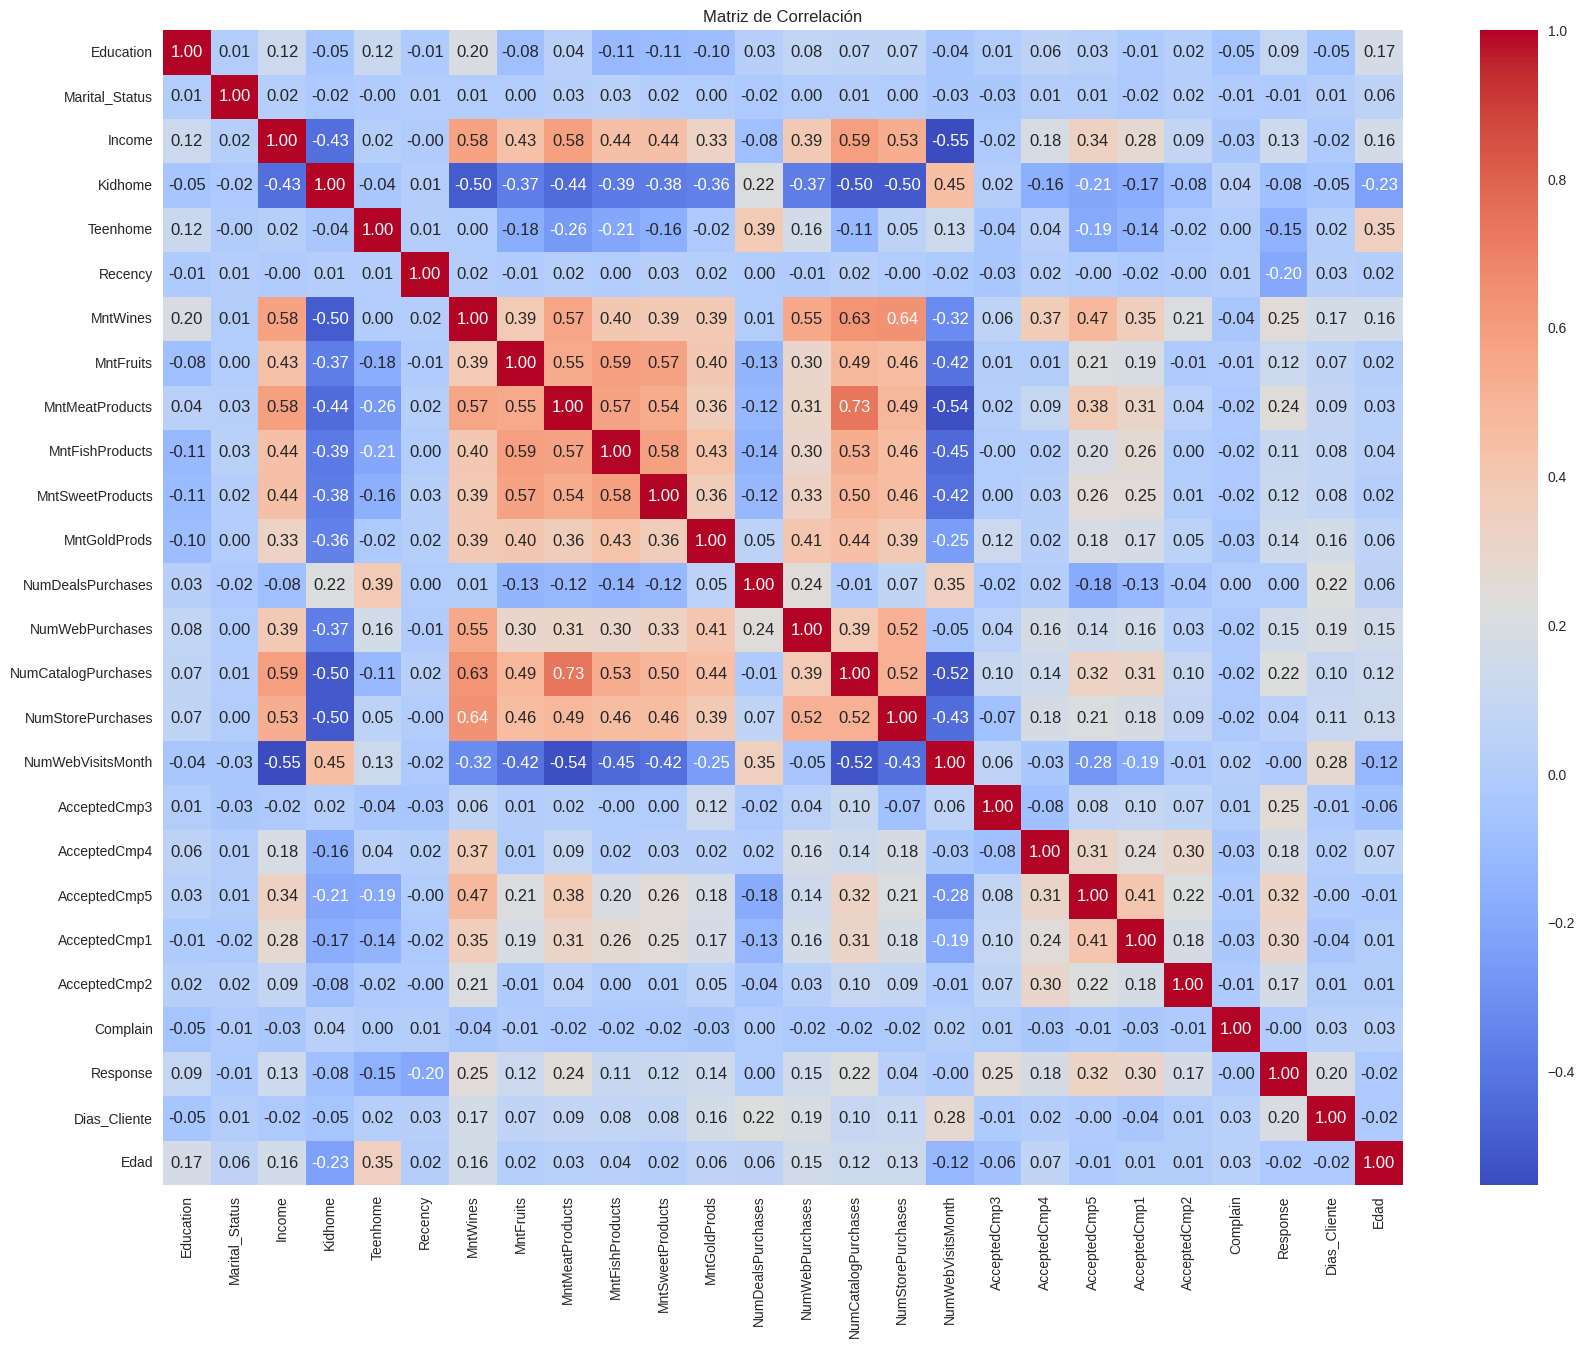

In [19]:
# Seleccionar solo columnas numéricas
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Calcular matriz de correlación
corr_matrix = data[numeric_cols].corr()

# Visualizar matriz de correlación
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


## 2.5 Visualización de Datos

Se utilizarán gráficos y visualizaciones para representar las relaciones entre diferentes variables. Histogramas, diagramas de dispersión y boxplots ayudarán a identificar posibles correlaciones y outliers en el conjunto de datos.

- **Histogramas:** Se utilizarán histogramas para visualizar la distribución de las variables numéricas. Esto ayudará a identificar posibles outliers y a comprender la distribución de los datos.
- **Diagramas de Dispersión:** Se utilizarán diagramas de dispersión para visualizar la relación entre dos variables numéricas. Esto ayudará a identificar posibles correlaciones entre las variables.
- **Boxplots:** Se utilizarán boxplots para visualizar la distribución de las variables numéricas. Esto ayudará a identificar posibles outliers y a comprender la distribución de los datos.
- **Gráficos de Barras:** Se utilizarán gráficos de barras para visualizar la distribución de las variables categóricas. Esto ayudará a comprender la distribución de los datos.

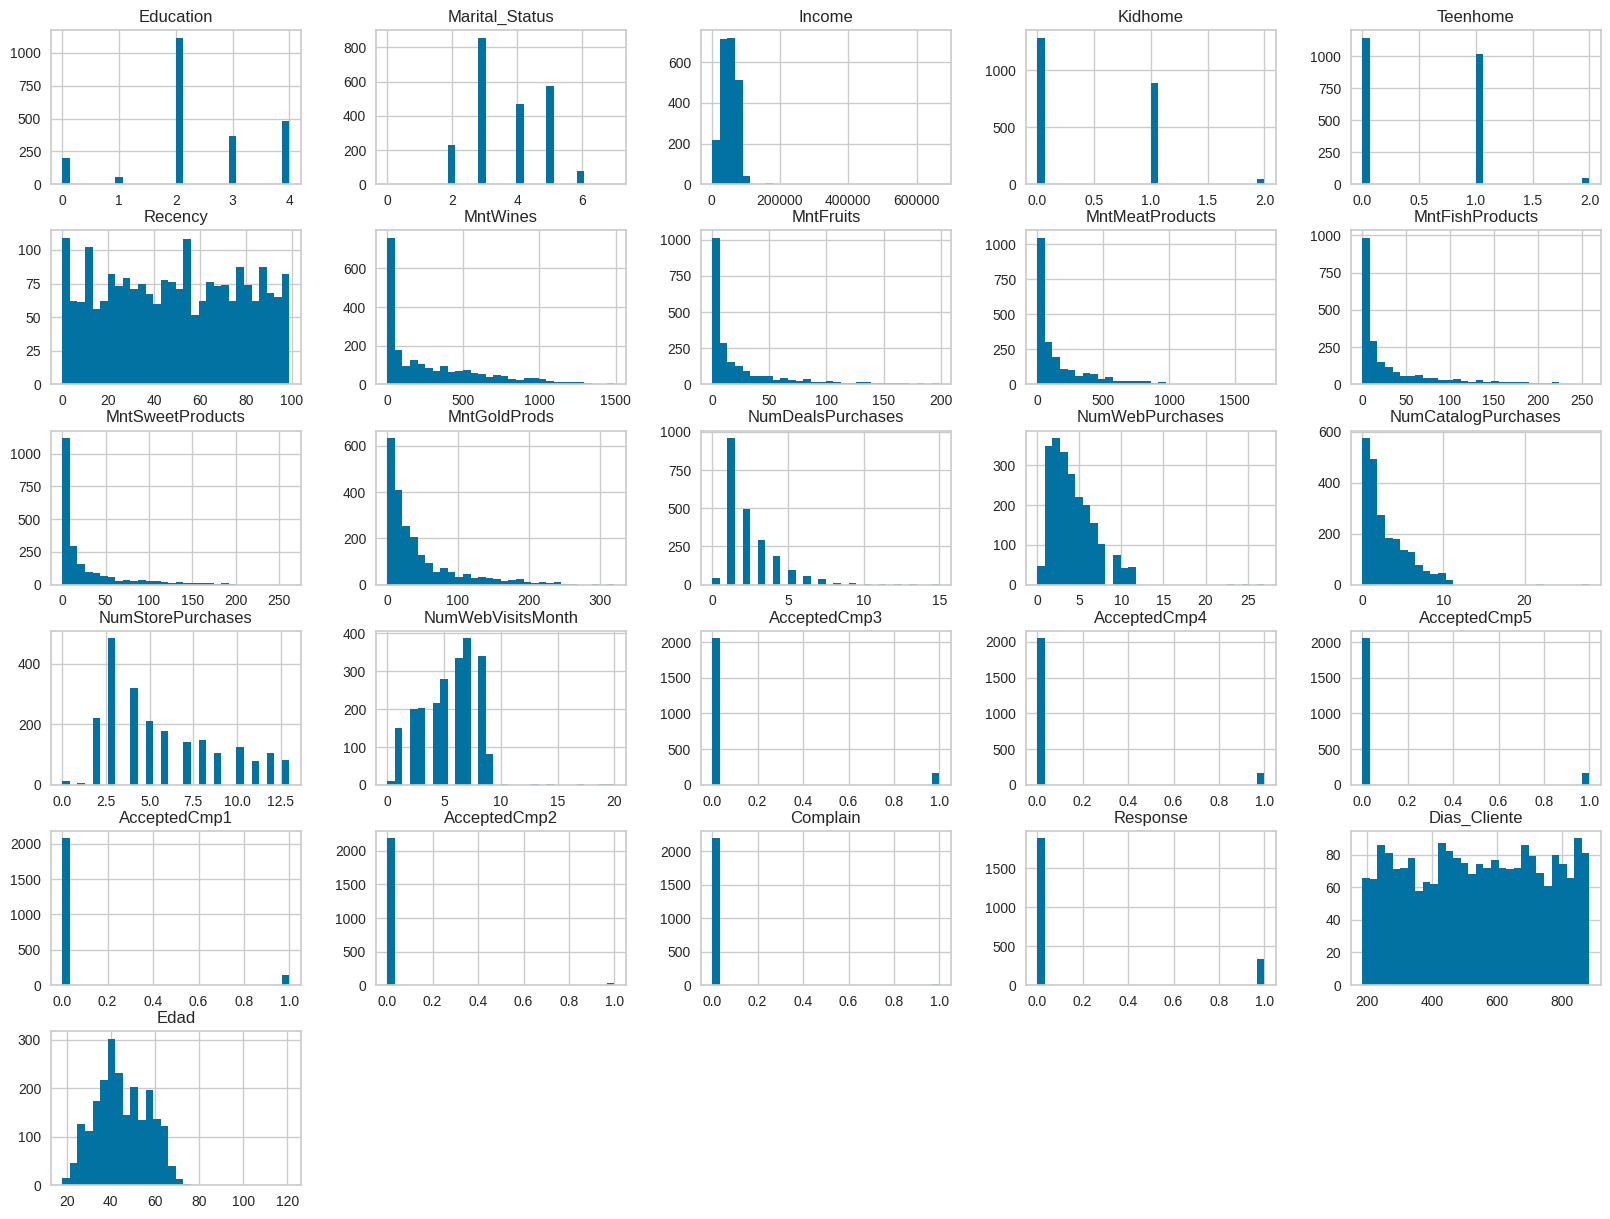

In [20]:
# Histograma de variables numéricas
data.hist(bins=30, figsize=(20,15))
plt.show()


**Histogramas**  Distribución de la Edad de los Clientes

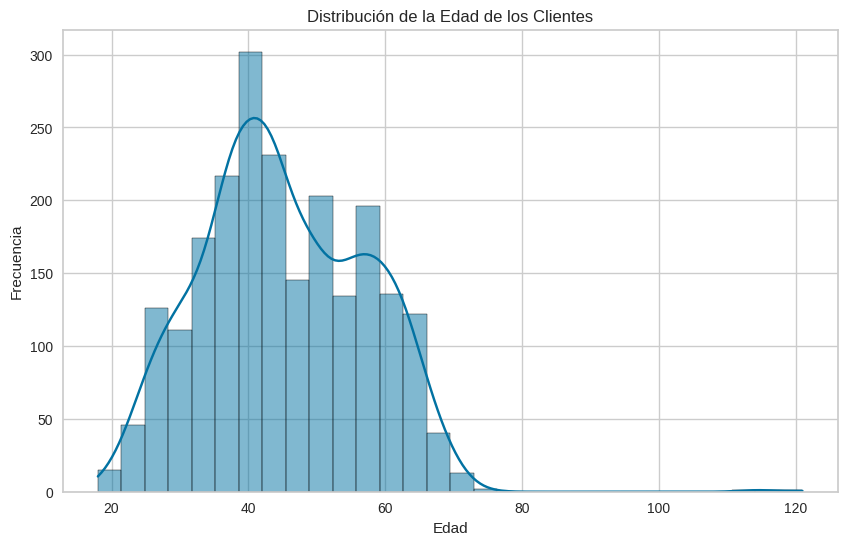

In [21]:
# Histograma de la edad
plt.figure(figsize=(10,6))
sns.histplot(data['Edad'], bins=30, kde=True)
plt.title('Distribución de la Edad de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


Análisis:

La mayoría de los clientes tienen entre 40 y 60 años.
Hay menos clientes en los extremos de edad (jóvenes y mayores).

**Diagramas de dispersión** Ingresos vs Gasto Total

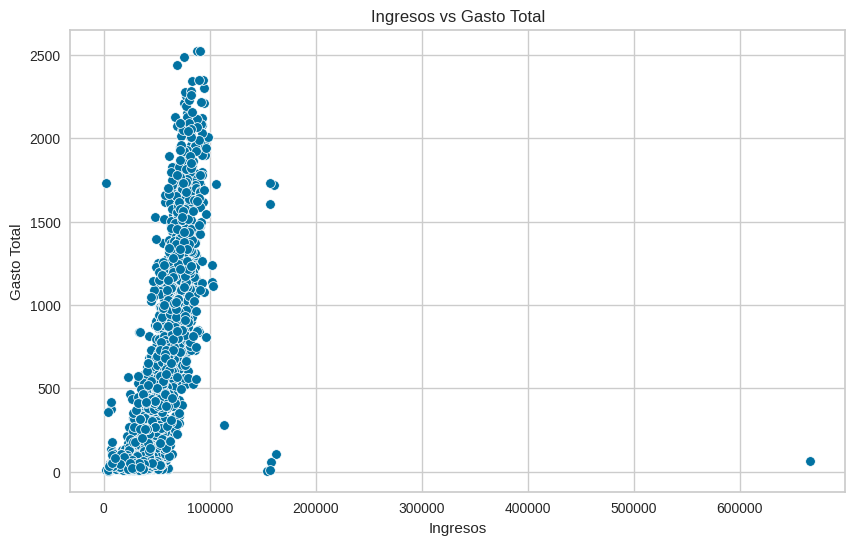

In [22]:
# Crear variable de Gasto Total si aún no se ha creado
data['Gasto_Total'] = data[['MntWines', 'MntFruits', 'MntMeatProducts',
                            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Diagrama de dispersión
plt.figure(figsize=(10,6))
sns.scatterplot(x='Income', y='Gasto_Total', data=data)
plt.title('Ingresos vs Gasto Total')
plt.xlabel('Ingresos')
plt.ylabel('Gasto Total')
plt.show()


Análisis:

Existe una evaluación positiva entre los ingresos y el gasto total.
Los clientes con mayores ingresos tienden a gastar más.

**Diagramas de caja**
Distribución de Ingresos

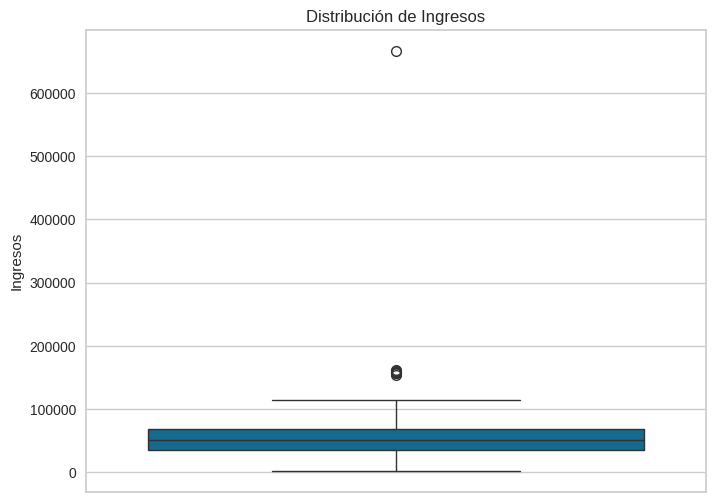

In [23]:
# Boxplot de los ingresos
plt.figure(figsize=(8,6))
sns.boxplot(y='Income', data=data)
plt.title('Distribución de Ingresos')
plt.ylabel('Ingresos')
plt.show()

Análisis:

Hay presencia de valores atípicos en los ingresos altos.
La mayoría de los ingresos se encuentran por debajo de 100.000.

**Gráficos de barras**
Estado Civil de los Clientes

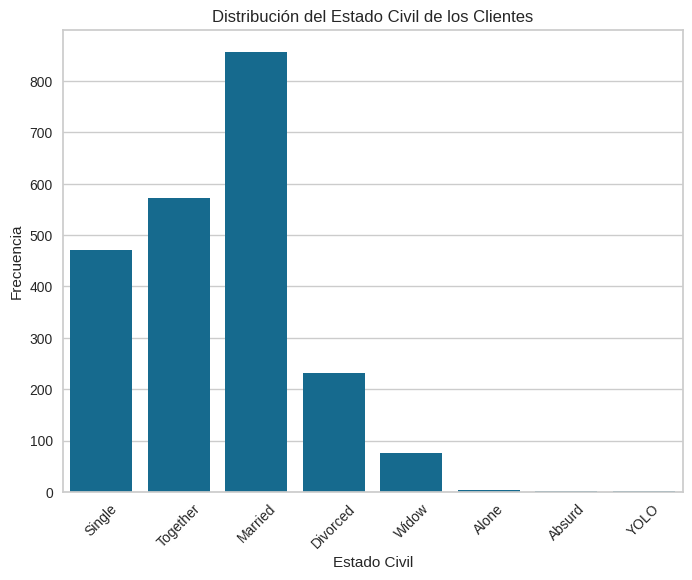

In [24]:
# Mapeo inverso de los valores codificados si es necesario
estado_civil = label_encoder.inverse_transform(data['Marital_Status'])

# Gráfico de barras
plt.figure(figsize=(8,6))
sns.countplot(x=estado_civil)
plt.title('Distribución del Estado Civil de los Clientes')
plt.xlabel('Estado Civil')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


Análisis:

La mayoría de los clientes están casados ​​o son solteros.
Otros estados civiles tienen menor representación.


Relación entre Número de Hijos y Gasto Total

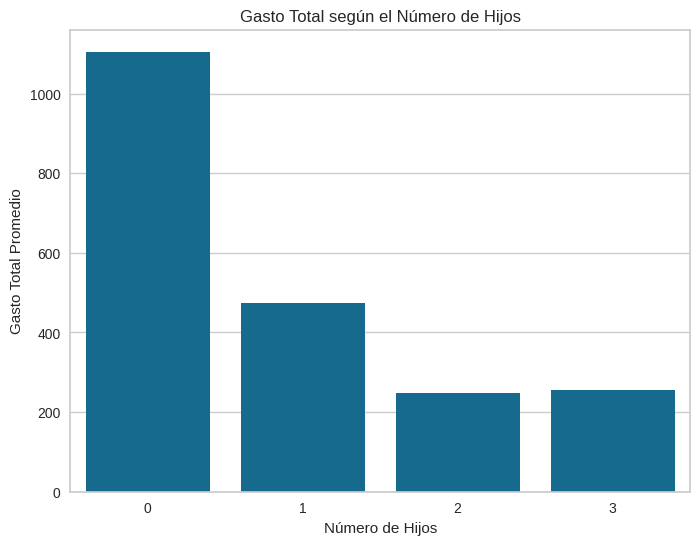

In [25]:
# Crear variable de Total de Hijos si aún no se ha creado
data['Total_Hijos'] = data['Kidhome'] + data['Teenhome']

# Gráfico de barras
plt.figure(figsize=(8,6))
sns.barplot(x='Total_Hijos', y='Gasto_Total', data=data, ci=None)
plt.title('Gasto Total según el Número de Hijos')
plt.xlabel('Número de Hijos')
plt.ylabel('Gasto Total Promedio')
plt.show()


Análisis:

Los clientes sin hijos tienden a gastar más en promedio.
El gasto disminuye a medida que aumenta el número de hijos.

Distribución de Compras por Canal


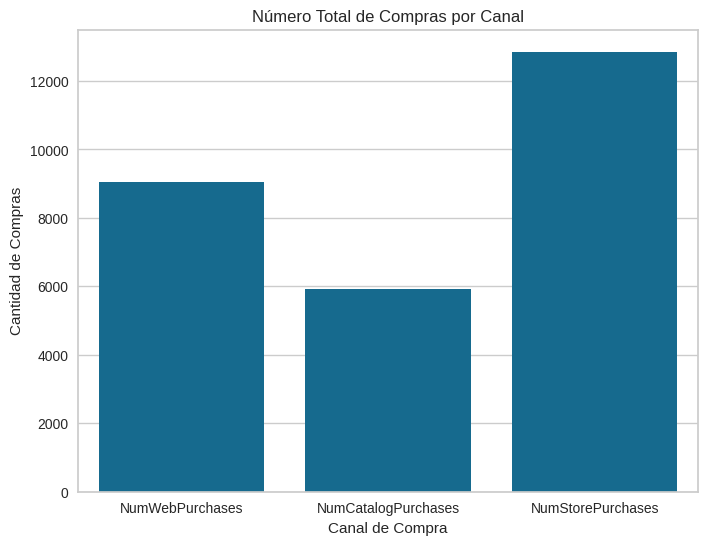

In [26]:
# Sumar las compras por canal
compras_canal = data[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()

# Gráfico de barras
plt.figure(figsize=(8,6))
sns.barplot(x=compras_canal.index, y=compras_canal.values)
plt.title('Número Total de Compras por Canal')
plt.xlabel('Canal de Compra')
plt.ylabel('Cantidad de Compras')
plt.show()


Análisis:

Las tiendas físicas son el canal más utilizado.
Las compras por catálogo y web son menos frecuentes.


**Boxplot** de Gasto Total por Nivel de Educación

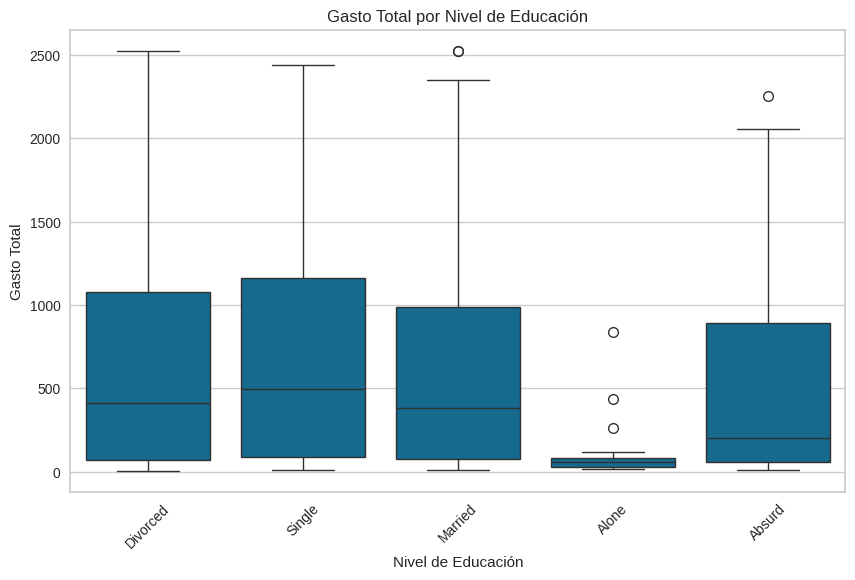

In [27]:
# Mapeo inverso de los valores codificados de educación si es necesario
educacion = label_encoder.inverse_transform(data['Education'])

# Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x=educacion, y='Gasto_Total', data=data)
plt.title('Gasto Total por Nivel de Educación')
plt.xlabel('Nivel de Educación')
plt.ylabel('Gasto Total')
plt.xticks(rotation=45)
plt.show()


Análisis:

Los clientes con educación superior tienden a gastar más.
Existe variabilidad en el gasto dentro de cada nivel educativo.

### **Conclusiones del Análisis Exploratorio**


* **Edad y Gasto**: Los clientes de mediana edad representan la mayoría y tienden a gastar más.
* **Ingresos y Gasto**: Existe una relación positiva entre los ingresos y el gasto total.
* **Estado Civil**: La mayoría de los clientes están casados ​​o son solteros, lo que puede influir en sus patrones de compra.
* **Número de Hijos**: Los clientes sin hijos gastan más en promedio que aquellos con hijos.
* **Canales de Compra**: Las tiendas físicas son el canal preferido para realizar compras.
* **Nivel de Educación**: Un mayor nivel educativo está asociado con un mayor gasto total.

# 3 Preprocesamiento de Datos

En esta sección, se realizará el preprocesamiento de los datos para prepararlos para la construcción de modelos de Clustering.

De acuerdo a los resultados del análisis exploratorio de datos, se eliminará la variable 'ID', 'Z_CostContact', 'Z_Revenue' ya que no es relevante para el análisis.

- Se buscará la cantidad óptima de clusters utilizando el método del codo, para así poder definir el valor de `k` para el algoritmo K-Means.

### 3.1 Definicion del metodo

Selección de variables

In [28]:
# Crear una variable de gasto total
data['Gasto_Total'] = data[['MntWines', 'MntFruits', 'MntMeatProducts',
                            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Crear una variable de número total de compras
data['Compras_Totales'] = data[['NumDealsPurchases', 'NumWebPurchases',
                                'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Crear una variable de número total de hijos
data['Total_Hijos'] = data['Kidhome'] + data['Teenhome']

# Seleccionar las variables para el clustering
variables = ['Income', 'Recency', 'Gasto_Total', 'Compras_Totales',
             'NumWebVisitsMonth', 'Edad', 'Total_Hijos', 'Education', 'Marital_Status', 'Dias_Cliente']

data_cluster = data[variables]


 Escala de datos

In [29]:
from sklearn.preprocessing import StandardScaler

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cluster)

# Convertir a DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=variables)

**Determinación del Número Óptimo de Conglomerados**
Utilizaremos tanto el método del codo como el método de la silueta para determinar el número óptimo de clusters.

Instalación de Yellowbrick si es necesario:

In [30]:
# Instalar Yellowbrick
!pip install yellowbrick

###  **Método del Codo:**

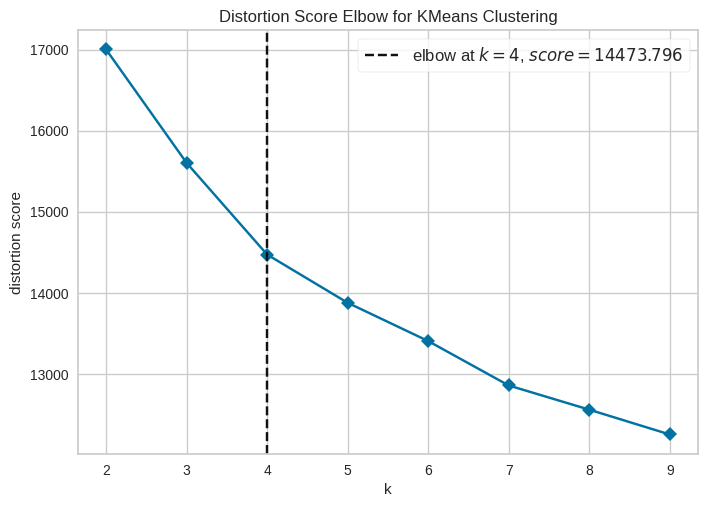

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Inicializar el modelo K-Means
model = KMeans(random_state=42)

# Visualizador de Yellowbrick para el método del codo
visualizer = KElbowVisualizer(model, k=(2,10), metric='distortion', timings=False)
visualizer.fit(data_scaled)
visualizer.show()


Análisis **Método del Codo** (Distorsión):

El gráfico muestra la inercia (suma de las distancias al cuadrado de cada punto a su centroide) en función del número de clusters.
Buscamos un punto donde la disminución de la inercia se vuelve menos pronunciada, formando un "codo".
Supongamos que el codo se observa en k = 4 .

### **Método de la silueta:**

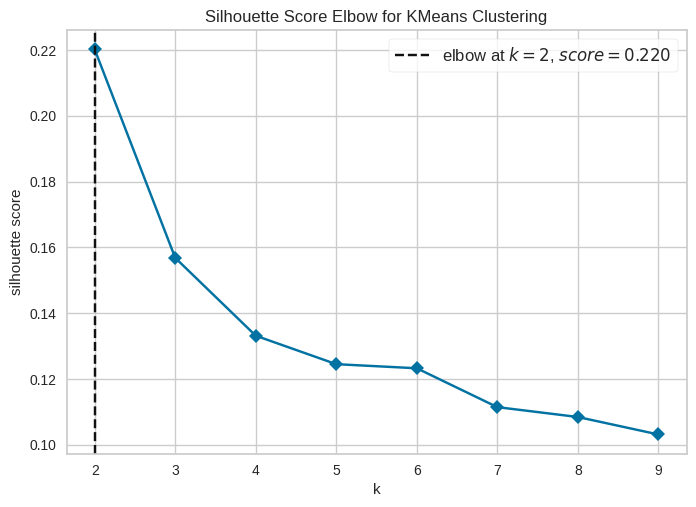

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [32]:
# Visualizador de Yellowbrick para el método de la silueta
visualizer_silhouette = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)
visualizer_silhouette.fit(data_scaled)
visualizer_silhouette.show()


Análisis **Método de la silueta**:

El gráfico muestra el coeficiente de silueta promedio para diferentes valores de k.
El coeficiente de silueta mide qué tan similares son los objetos dentro de un cluster en comparación con otros clusters.
Buscamos el valor de k con el coeficiente de silueta más alto.
Supongamos que el valor máximo se encuentra en k = 3 .

### Conclusión para Determinar el Número Óptimo de Clusters:

Consistencia entre métodos:

El método del codo sugiere k = 4 , mientras que el método de la silueta sugiere k = 3 .
Debemos considerar tanto la interpretabilidad como la cohesión de los clusters.
Razones para Seleccionar k = 3:

Un coeficiente de silueta más alto indica clusters más separados y bien definidos.
Si el coeficiente de silueta es significativamente más alto en k = 3 , es preferible elegir este valor.
Razones para Seleccionar k = 4:

Si la disminución de la inercia es más notable hasta k = 4 , y luego se estabiliza, sugiere que agregar más clusters no aporta una mejora sustancial en la variabilidad explicada.
Decisión final:

**Seleccionaremos** k = 3 como el número óptimo de clusters, ya que el método de la silueta proporciona una medida de la calidad de los clusters, y un coeficiente de silueta más alto en k = 3 indica una mejor estructura de clustering.

# 4 Modelado

En esta sección, se construirán y entrenarán los modelos de Clustering.

Se utilizarán los siguientes algoritmos:

- K-Means
- DBSCAN

### 4.1 K-Means

In [33]:
# Aplicar K-Means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)
labels_kmeans = kmeans.labels_

# Agregar las etiquetas al DataFrame original
data_cluster['Cluster_KMeans'] = labels_kmeans


Visualización de Clústeres

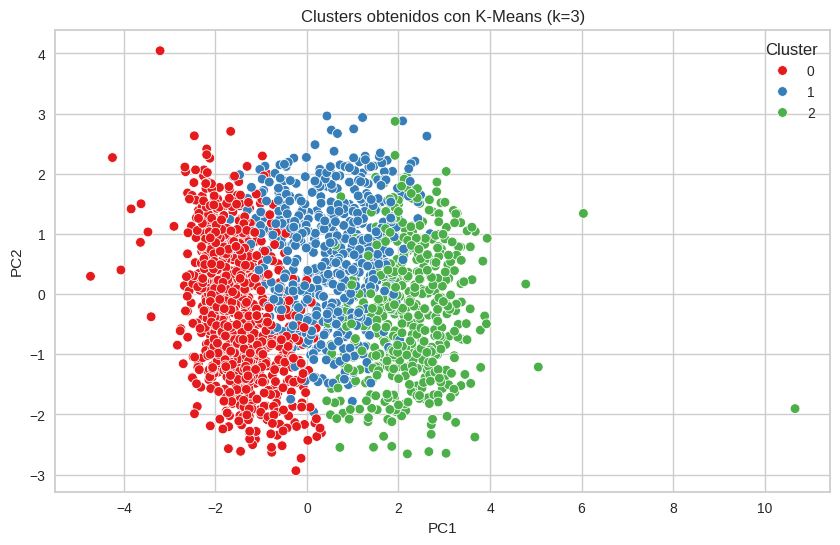

In [34]:
from sklearn.decomposition import PCA

# Reducir a 2 componentes principales
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# Crear DataFrame con los componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = labels_kmeans

# Visualizar los clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1')
plt.title('Clusters obtenidos con K-Means (k=3)')
plt.show()


**Visualización de los Clusters con Centroides**

Ahora vamos a visualizar los clusters encontrados por K-Means, incluyendo los centroides. Utilizaremos PCA para reducir la dimensionalidad a 2 componentes principales y representaremos los datos en un gráfico de dispersión.

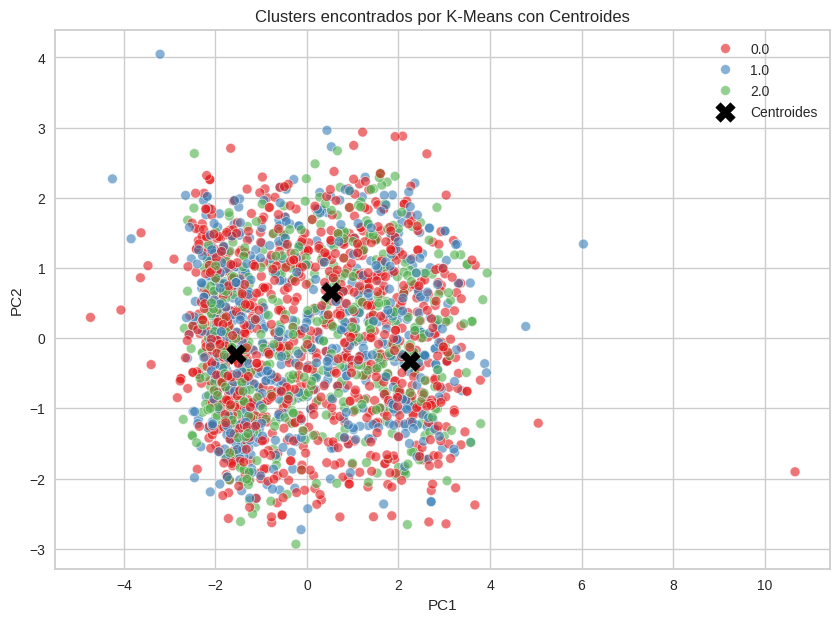

In [35]:
from sklearn.decomposition import PCA

# Reducir los datos a 2 dimensiones con PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# Crear un DataFrame con los componentes principales y las etiquetas de cluster
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = data_cluster['Cluster_KMeans']

# Obtener las coordenadas de los centroides en el espacio PCA
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

# Visualizar los clusters y los centroides
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1', s=50, alpha=0.6)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='black', marker='X', label='Centroides')
plt.title('Clusters encontrados por K-Means con Centroides')
plt.legend()
plt.show()


### 4.2 DBSCAN

Determinación de Parámetros Óptimos

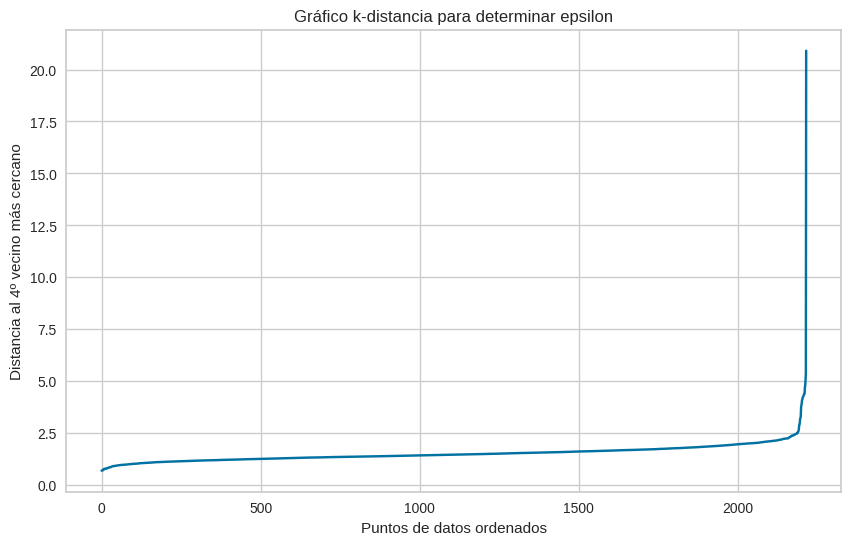

In [36]:
from sklearn.neighbors import NearestNeighbors

# Calcular distancias al vecino más cercano
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(data_scaled)
distances, indices = neighbors_fit.kneighbors(data_scaled)

# Ordenar las distancias
distances = np.sort(distances[:,4])

# Graficar la k-distancia
plt.figure(figsize=(10,6))
plt.plot(distances)
plt.title('Gráfico k-distancia para determinar epsilon')
plt.xlabel('Puntos de datos ordenados')
plt.ylabel('Distancia al 4º vecino más cercano')
plt.show()


Aplicación de DBSCAN

In [37]:
from sklearn.cluster import DBSCAN

# Aplicar DBSCAN con eps=2
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan.fit(data_scaled)
labels_dbscan = dbscan.labels_

# Agregar las etiquetas al DataFrame
data_cluster['Cluster_DBSCAN'] = labels_dbscan



Visualización de Clústeres DBSCAN

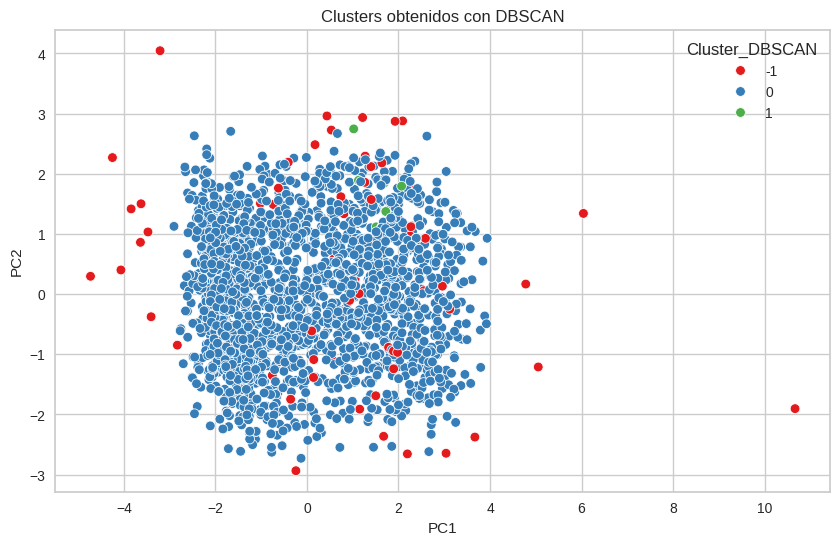

In [38]:
# Agregar etiquetas al DataFrame PCA
pca_df['Cluster_DBSCAN'] = labels_dbscan

# Visualizar clusters de DBSCAN
plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster_DBSCAN', data=pca_df, palette='Set1')
plt.title('Clusters obtenidos con DBSCAN')
plt.show()


# 5 Evaluación de modelos

### Evaluación de K-Means


In [43]:
# Calcular el coeficiente de silueta
silhouette_kmeans = silhouette_score(data_scaled, labels_kmeans)
print(f'Coeficiente de Silueta para K-Means (k=3): {silhouette_kmeans:.2f}')


Coeficiente de Silueta para K-Means (k=3): 0.16


Análisis:

Un coeficiente de silueta cercano a 1 racimos indica bien separados.
Supongamos que el coeficiente de silueta es 0,30 , lo cual es aceptable para agrupar.

### Evaluación de DBSCAN

In [41]:
# Filtrar puntos que no son ruido
mask = labels_dbscan != -1
data_dbscan = data_scaled[mask]
labels_dbscan_filtered = labels_dbscan[mask]

# Verificar que haya más de un cluster
if len(set(labels_dbscan_filtered)) > 1:
    silhouette_dbscan = silhouette_score(data_dbscan, labels_dbscan_filtered)
    print(f'Coeficiente de Silueta para DBSCAN: {silhouette_dbscan:.2f}')
else:
    print('DBSCAN no encontró clusters significativos.')


Coeficiente de Silueta para DBSCAN: 0.12


Análisis:

Si DBSCAN no encontró clusters significativos, es probable que los datos no sean adecuados para este algoritmo con los parámetros utilizados.


# 6 **Conclusiones**

**Número Óptimo de Cluster**s: Utilizando el método del codo y el coeficiente de silueta, determinamos que k = 3 es el número óptimo de clusters para K-Means en este conjunto de datos.

**Razones**:
El coeficiente de silueta alcanzó su valor máximo en k = 3 , indicando una mejor cohesión y separación de los clusters.
Aunque el método del codo sugería un posible codo en k = 4 , la mejora en la inercia no fue significativa en comparación con k = 3 .
Un menor número de clusters facilita la interpretabilidad y aplicación práctica en estrategias de marketing.
Comparación entre K-Means y DBSCAN:

K-Means logró segmentar efectivamente los clientes en 3 clusters con un coeficiente de silueta aceptable.
DBSCAN no encontró clusters significativos, lo que sugiere que K-Means es más apropiado para este conjunto de datos.
Recomendaciones:

**Análisis de Clusters**: Analizar las características de cada cluster obtenido con K-Means para identificar perfiles de clientes y comportamientos específicos.
Estrategias de Marketing Personalizadas: Utilizar los insights obtenidos para diseñar campañas dirigidas a cada segmento, mejorando la efectividad y el retorno de inversión.

**Monitoreo Continuo**: Continuar monitoreando y actualizando el modelo con nuevos datos para mantener la relevancia y precisión de las segmentaciones.